## Task 18 - Diabetes Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

*Read **diabetes_dirty.csv** into your Jupyter Notebook.*

Load the dataset.

In [3]:
df = pd.read_csv('diabetes_dirty.csv')
df.head()

# look for missing values, the results of .info() shows that we don't have any for this dataset
# df.info()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Pre-processing

A visual inspection and looking at the distribution of the varibles in the dataset we can see that we have no missing data. Most of the variables are normally distributed. 

In [4]:
print (df.columns)

#Take a look at the distribution of the variables in the dataset
# for col in df.columns:
#     sns.histplot(data = df, x = col)
#     plt.show()

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6',
       'PROGRESSION'],
      dtype='object')


*Differentiate between the independent variables and the dependent variable, and assign them to variables X and y.*

Here we will be using linear regression on multiple features to predict a person’s progression towards diabetes with respect to various attributes about them. Therefore, 'Progression' will be the target (dependent variable) (note that this is continous and so suitable for prediction with a regression model) and the other variables will be the features (independent variable). 

In [5]:
X = df.drop("PROGRESSION", axis =1) # input matrix
y = df["PROGRESSION"] # target vector

*Generate training and test sets comprising 80% and 20% of the data,
respectively.*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=42)

### Feature scaling

*Investigate the necessity for scaling or normalization of the data. Employ
MinMaxScaler and StandardScaler if necessary. Fit these scalers on the
training set and apply the fitted scalers to transform both the training and
test sets accordingly.*

The below plots show that the independent variables are mostly normally distributed, and so are suitable to be scaled with standard scalar. I have chosen to scale all variables with StandardScalar though the code below allows one to have a mixture between MinMaxScaler() and StandardScalar()

In [7]:
# Uncomment one or both of the below plotting features to have a look at the distributions of the independent varibles  

# sns.pairplot(data=X_train)

# for col in X_train.columns:
#     sns.histplot(data = X_train, x = col)
#     plt.show()

In [8]:
# Fit the scalers on training data
sc_mm =  MinMaxScaler()
sc_mm.fit(X_train)

sc_ss = StandardScaler()
sc_ss.fit(X_train)

# Apply the MinMax scalar on train and test data
X_train_mm = sc_mm.transform(X_train)
X_test_mm = sc_mm.transform(X_test)

# Apply the Standard scalar on train and test data
X_train_ss = sc_ss.transform(X_train)
X_test_ss = sc_ss.transform(X_test)

# Make the default scaling MinMax
X_train_scaled=X_train_mm.copy()
X_test_scaled=X_test_mm.copy()

# Choose the variables to use StandardScalar on
# AGE - 0, SEX - 1, BMI - 2, BP - 3, S1 - 4, S2 - 5, S3 - 6, S4 - 7, S5 - 8, S6 - 9,

normal_vars=[0,1,2,3,4,5,6,7,8,9]     # These are the variables that will be scaled with StandardScalar()

# apply StandardScaling to the normally distributed variables
for i in normal_vars:
      X_train_scaled[:,i] = X_train_ss[:,i]
      X_test_scaled[:,i] = X_test_ss[:,i]

### Fit the Linear Regression model

*Generate a multiple linear regression model using the training set. Use all
of the independent variables.*

*Print out the intercept and coefficients of the trained model.*

Here we fit a linear regression model to the training set and print out the model intercept and coefficients

In [9]:
# create an empty model
diabetes_model = LinearRegression()

# fit the model
diabetes_model.fit(X_train_scaled,y_train)

# Extract the model parameters
print('Intercept:', diabetes_model.intercept_)
print('Coefficients:', diabetes_model.coef_)

# # AGE - 0, SEX - 1, BMI - 2, BP - 3, S1 - 4, S2 - 5, S3 - 6, S4 - 7, S5 - 8, S6 - 9,

Intercept: 153.7365439093484
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


### Predictions

*Generate predictions for the test set.*

The model is fitted to scaled non-dimensionalised data. To make the interpretation of our predictions more meaningful we would need to reverse transform our independent variables so that they had the same units as the measured values.

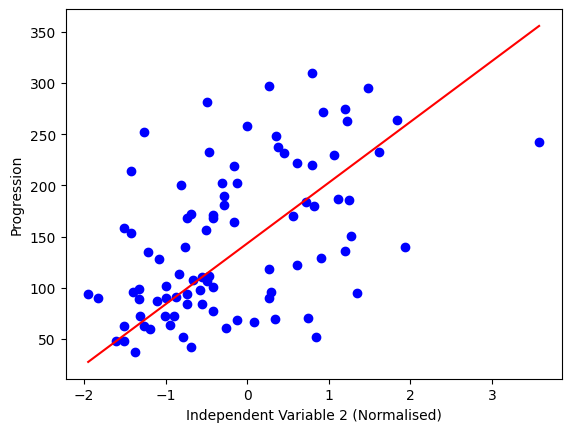

In [10]:
# Plot the data and model
y_pred = diabetes_model.predict(X_test_scaled)

# Create line coordinates
X_line = np.empty(X_test_scaled.shape)
for i in range(X_test_scaled.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test_scaled[:,i]), np.max(X_test_scaled[:,i]), num=X_test_scaled.shape[0])
y_line = diabetes_model.predict(X_line)

var_num = 2
plt.scatter(X_test_scaled[:,var_num],y_test,color = 'b')
plt.plot(X_line[:,var_num],y_line,color = 'r')
plt.xlabel(f'Independent Variable {var_num} (Normalised)')
plt.ylabel('Progression')
plt.show()

### Evaluation

*Compute R-squared for your model on the **test set**.*

The R2 score represents the proportion of variance in the target variable that can be explained by the model. An R-squared value close to 1 shows a better fit with the data. The R-squared of 0.4526 is higher than for the simple regression model used in Task 17. 

In [11]:
# R squared score
r2= r2_score(y_test,y_pred)
print(f"R-squared: {round(r2,4)}")

R-squared: 0.4526
